In [12]:
import pandas as pd
import numpy as np
from pandas import read_csv
import re

In [4]:
data_path = 'C:/Users/hamis/Desktop/ML/NCS 数据专家 笔试/PreScreen_r3_pw - 1234/PreScreen_r3/Q3 data.txt'

In [5]:
Q3_df = [line.strip() for line in open(data_path,encoding='UTF-8').readlines()]

['As a term, data analytics predominantly refers to an assortment of applications, from basic business',
 'intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced',
 "analytics. In that sense, it's similar in nature to business analytics, another umbrella term for",
 'approaches to analyzing data -- with the difference that the latter is oriented to business uses, while',
 "data analytics has a broader focus. The expansive view of the term isn't universal, though: In some",
 'cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate',
 'category. Data analytics initiatives can help businesses increase revenues, improve operational',
 'efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to',
 'emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of',
 "boosting business performance. Depending on the particular application, th

In [44]:
def clean_text(input_line):
    output_list = re.split('[, ( ) ? ! . -]', input_line.strip())
    while '' in output_list:
        output_list.remove('')
    return output_list

In [90]:
clean_line = []
for i in range(len(Q3_df)):
    clean_temp = clean_text(Q3_df[i])
    clean_new = []
    for txt in clean_temp:
        clean_new.append(txt.lower())
    clean_line.append(clean_new)
    
#clean_line

[['as',
  'a',
  'term',
  'data',
  'analytics',
  'predominantly',
  'refers',
  'to',
  'an',
  'assortment',
  'of',
  'applications',
  'from',
  'basic',
  'business'],
 ['intelligence',
  'bi',
  'reporting',
  'and',
  'online',
  'analytical',
  'processing',
  'olap',
  'to',
  'various',
  'forms',
  'of',
  'advanced'],
 ['analytics',
  'in',
  'that',
  'sense',
  "it's",
  'similar',
  'in',
  'nature',
  'to',
  'business',
  'analytics',
  'another',
  'umbrella',
  'term',
  'for'],
 ['approaches',
  'to',
  'analyzing',
  'data',
  'with',
  'the',
  'difference',
  'that',
  'the',
  'latter',
  'is',
  'oriented',
  'to',
  'business',
  'uses',
  'while'],
 ['data',
  'analytics',
  'has',
  'a',
  'broader',
  'focus',
  'the',
  'expansive',
  'view',
  'of',
  'the',
  'term',
  "isn't",
  'universal',
  'though:',
  'in',
  'some'],
 ['cases',
  'people',
  'use',
  'data',
  'analytics',
  'specifically',
  'to',
  'mean',
  'advanced',
  'analytics',
  'treat

# Q3-a

In [92]:
for i in range(len(clean_line)):
    count_data = sum(np.array(clean_line[i]) == 'data')
    num_txt = len(clean_line[i])
    prob_data = count_data/num_txt
    print('line ', i, " prob: ", prob_data)

line  0  prob:  0.06666666666666667
line  1  prob:  0.0
line  2  prob:  0.0
line  3  prob:  0.0625
line  4  prob:  0.058823529411764705
line  5  prob:  0.06666666666666667
line  6  prob:  0.09090909090909091
line  7  prob:  0.0
line  8  prob:  0.0
line  9  prob:  0.08333333333333333
line  10  prob:  0.0
line  11  prob:  0.05555555555555555
line  12  prob:  0.13333333333333333
line  13  prob:  0.15384615384615385
line  14  prob:  0.0625
line  15  prob:  0.0
line  16  prob:  0.125
line  17  prob:  0.14285714285714285
line  18  prob:  0.07142857142857142
line  19  prob:  0.0
line  20  prob:  0.06666666666666667
line  21  prob:  0.0


# Q3-b

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
distinct_word = []
for i in range(len(clean_line)):
    distinct_word.append(len(set(clean_line[i])))
#distinct_word

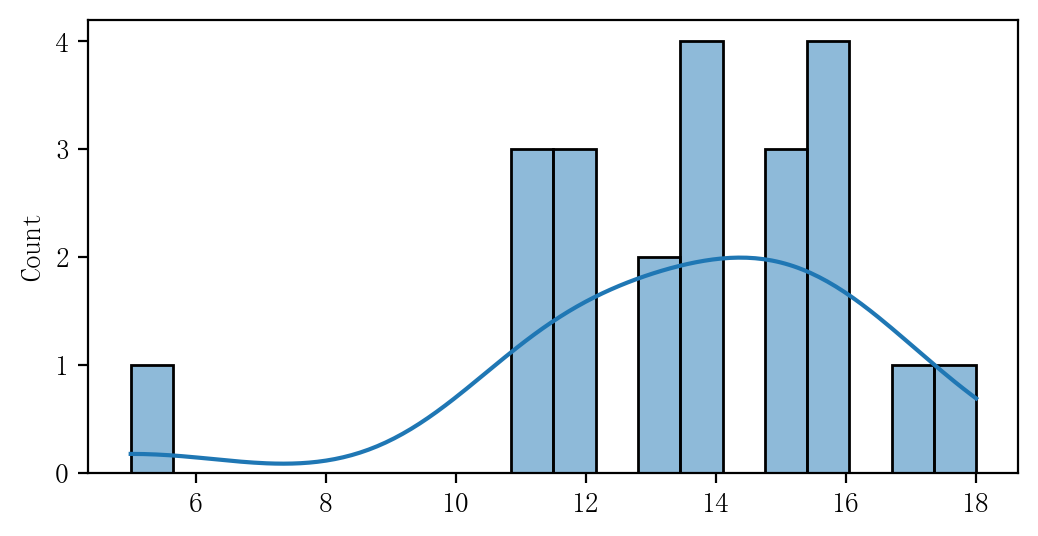

In [95]:
plt.rcParams['font.sans-serif'] = ['SimSun']
fig, axes = plt.subplots(1,1, figsize = (6, 3), dpi = 200)
sns.histplot(distinct_word, bins = 20, kde = True)
plt.show()

# Q3-c

In [123]:
scan_data_following = []
for i in range(len(clean_line)):
    try:
        data_location = list(np.array(clean_line[i]) == 'data')
        data_location_list = []
        for q in range(len(data_location)):
            if data_location[q] == True:
                data_location_list.append(q)
        #data_location_list
        for k in data_location_list:
            if k == len(clean_line[i]) -1 and i != len(clean_line) - 1:
                scan_data_following.append(clean_line[i][k:k+2] + clean_line[i+1][0:1])
            else:
                scan_data_following.append(clean_line[i][k:k+2])
    except:
        pass
scan_data_following    

[['data', 'analytics'],
 ['data', 'with'],
 ['data', 'analytics'],
 ['data', 'analytics'],
 ['data', 'analytics'],
 ['data', "that's"],
 ['data', 'sources'],
 ['data', 'analytics'],
 ['data', 'analysis'],
 ['data', 'and'],
 ['data', 'analysis'],
 ['data', 'set'],
 ['data', 'analysis'],
 ['data', 'analytics'],
 ['data', 'analysis'],
 ['data', 'analysis'],
 ['data', 'with'],
 ['data', 'like']]

In [125]:
count_analytics = 0
for i in range(len(scan_data_following)):
    if scan_data_following[i][1] == 'analytics':
        count_analytics += 1

data_analytics_prob = count_analytics/len(scan_data_following)
data_analytics_prob

0.3333333333333333